In [95]:
import sqlite3
import pandas as pd

# Connect to the SQLite database (if the database doesn't exist, it will be created)
conn = sqlite3.connect('Main_DB')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Your SQL query
temp_df = '''
SELECT * from wind
'''

# Read SQL query result into a DataFrame
wind = pd.read_sql_query(temp_df, conn)
wind.rename(columns={'value': 'wind_generation'}, inplace=True)

# Your SQL query
temp_df = '''
SELECT * from spot_price
'''

# Read SQL query result into a DataFrame
spot_price = pd.read_sql_query(temp_df, conn)

# Read SQL query result into a DataFrame
spot_price = pd.read_sql_query(temp_df, conn)
spot_price.rename(columns={'value': 'spot_price'}, inplace=True)

# Your SQL query
temp_df = '''
SELECT * from solar
'''

# Read SQL query result into a DataFrame
solar = pd.read_sql_query(temp_df, conn)
solar.rename(columns={'value': 'solar_generation'}, inplace=True)

# Your SQL query
temp_df = '''
SELECT * from demand
'''

# Read SQL query result into a DataFrame
demand = pd.read_sql_query(temp_df, conn)
demand.rename(columns={'value': 'demand'}, inplace=True)

# Your SQL query
temp_df = '''
SELECT * from nuclear
'''

# Read SQL query result into a DataFrame
nuclear = pd.read_sql_query(temp_df, conn)
nuclear.rename(columns={'value': 'nuclear_generation'}, inplace=True)

# SQL query
temp_df = '''
SELECT * from gas_data
'''

# Read SQL query result into a DataFrame
gas_data = pd.read_sql_query(temp_df, conn)
gas_data.rename(columns={'value': 'gas_price'}, inplace=True)
gas_data_hourly = gas_data.reindex(gas_data.index.repeat(24)).reset_index(drop=True)

# Close the connection
conn.close()

# Display the DataFrame


In [96]:
df=wind.merge(spot_price, left_on=['day', 'hour'], right_on=['day', 'hour']) \
        .merge(solar, left_on=['day', 'hour'], right_on=['day', 'hour']) \
        .merge(demand, left_on=['day', 'hour'], right_on=['day', 'hour']) \
        .merge(nuclear, left_on=['day', 'hour'], right_on=['day', 'hour']) \
        .merge(gas_data, left_on=['day'], right_on=['delivery_day'])\
        .drop('delivery_day', axis=1)

df.head(5)

,wind_generation,day,hour,spot_price,solar_generation,demand,nuclear_generation,index_price
0,3214.0,2019-01-01,01:00,66.88,0.0,23753.0,6071.9,24.45
1,3222.0,2019-01-01,02:00,66.88,0.0,23018.0,6071.9,24.45
2,3081.0,2019-01-01,03:00,66.00,0.0,21808.0,6071.9,24.45
3,3069.0,2019-01-01,04:00,63.64,0.0,20635.0,6071.9,24.45
4,2973.0,2019-01-01,05:00,58.85,0.0,19824.0,6071.9,24.45


In [103]:
low_bidding_price = ['solar_generation', 'wind_generation', 'nuclear_generation']
renewable = ['solar_generation', 'wind_generation']




# Create a new column based on the condition
df['covered_renewables'] = (df[renewable].sum(axis=1) > df['demand']).astype(int)
df['covered_low_price'] = (df[low_bidding_price].sum(axis=1) > df['demand']).astype(int)



In [104]:
df = df.dropna()
df


,wind_generation,day,hour,spot_price,solar_generation,demand,nuclear_generation,index_price,covered_renewables,covered_low_price
0,3214.0,2019-01-01,01:00,66.88,0.0,23753.0,6071.9,24.45,0,0
1,3222.0,2019-01-01,02:00,66.88,0.0,23018.0,6071.9,24.45,0,0
2,3081.0,2019-01-01,03:00,66.00,0.0,21808.0,6071.9,24.45,0,0
3,3069.0,2019-01-01,04:00,63.64,0.0,20635.0,6071.9,24.45,0,0
4,2973.0,2019-01-01,05:00,58.85,0.0,19824.0,6071.9,24.45,0,0
...,...,...,...,...,...,...,...,...,...,...
44074,1717.3,2023-12-24,19:00,101.55,7.9,27428.5,7117.2,31.61,0,0
44075,1943.5,2023-12-24,20:00,109.30,0.0,27998.0,7117.2,31.61,0,0
44076,1942.0,2023-12-24,21:00,109.30,0.0,27489.3,7117.2,31.61,0,0
44077,1836.0,2023-12-24,22:00,92.85,0.0,25901.0,7117.2,31.61,0,0


In [106]:
df[df['covered_renewables']==1]

,wind_generation,day,hour,spot_price,solar_generation,demand,nuclear_generation,index_price,covered_renewables,covered_low_price
28968,13037.0,2022-04-10,18:00,1.03,9242.8,22194.0,6001.6,98.49,1,1
29279,17892.0,2022-04-23,17:00,1.17,8245.1,25331.0,6125.5,77.85,1,1
29280,17885.0,2022-04-23,18:00,1.17,7583.1,24493.0,6125.5,77.85,1,1
29281,17552.0,2022-04-23,19:00,1.17,6702.7,24107.0,6125.5,77.85,1,1
36787,16334.3,2023-02-26,16:00,4.16,9298.2,24989.5,6121.4,49.74,1,1
...,...,...,...,...,...,...,...,...,...,...
42891,16317.5,2023-11-05,12:00,0.00,9007.4,22281.0,5061.6,36.38,1,1
42892,16304.3,2023-11-05,13:00,0.00,9322.4,22499.8,5061.6,36.38,1,1
42893,16252.3,2023-11-05,14:00,0.00,9081.8,23123.0,5061.6,36.38,1,1
42894,16140.8,2023-11-05,15:00,0.00,8239.0,23285.3,5061.6,36.38,1,1


In [107]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df[['wind_generation', 'solar_generation', 'demand', 'index_price', 'nuclear_generation', 'covered_renewables', 'covered_low_price']]
y = df['spot_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [109]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [110]:
coefficients = reg.coef_
intercept = reg.intercept_

print('Intercept:', intercept)
print('Coefficients:', coefficients)

Intercept: 61.493824882089456
Coefficients: [-3.12078362e-03 -3.06267245e-03  2.69840296e-03  1.46839654e+00
 -1.22224685e-02  5.08125177e+00 -3.03118965e+01]


In [111]:
reg.score(X, y)

0.706312046221151

In [112]:
pred_reg = reg.predict(X_test)

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming pred_reg contains the predicted values from the regression model
# y_test contains the actual target values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_reg)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r2 = r2_score(y_test, pred_reg)
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1369.261214422768
R-squared (R2): 0.7070227473274783


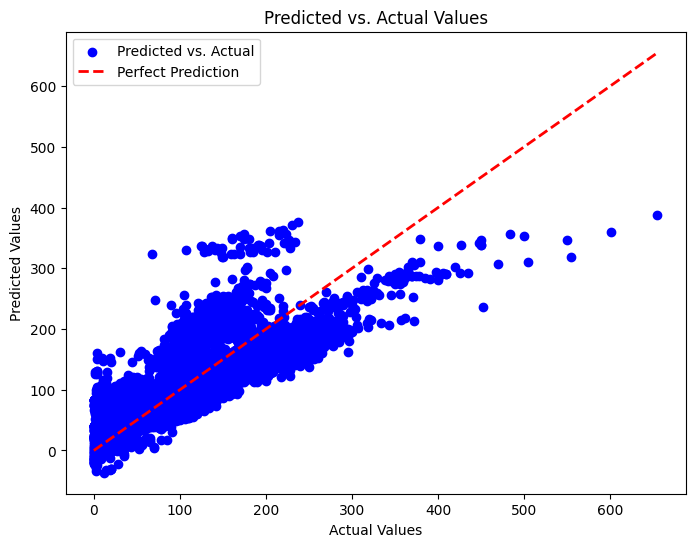

In [114]:
import matplotlib.pyplot as plt

# Assuming pred_reg contains the predicted values from the regression model
# y_test contains the actual target values

# Plotting the predicted values vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_reg, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()


In [115]:
import pandas as pd

# Assuming pred_reg contains the predicted values and y_test contains the actual values
# Creating a DataFrame with 'Predicted' and 'Actual' columns
df_comparison = pd.DataFrame({
    'Predicted': pred_reg,  # Replace 'pred_reg' with your predicted values
    'Actual': y_test        # Replace 'y_test' with your actual values
})

# Display the DataFrame
print(df_comparison)


        Predicted  Actual
5478    45.513468   38.01
5920    56.896954   41.07
6868    34.423974   32.07
20026   62.794932   66.76
41600   76.278600  104.04
...           ...     ...
15837   57.264175   40.40
1029    95.549031   66.25
21990    0.855235   18.77
33114  129.012827   92.72
42492  101.280211   80.00

[11020 rows x 2 columns]


In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor(random_state=42, min_samples_split=50)
regressor.fit(X_train, y_train)

# Predict on the test set
pred_CART = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, pred_CART)
print("Mean Squared Error:", mse)

Mean Squared Error: 422.94212714288386


In [117]:
df_comparison = pd.DataFrame({
    'Predicted': pred_CART,  # Replace 'pred_reg' with your predicted values
    'Actual': y_test        # Replace 'y_test' with your actual values
})

# Display the DataFrame
X_test

,wind_generation,solar_generation,demand,index_price,nuclear_generation,covered_renewables,covered_low_price
5478,2067.0,77.6,22721.0,11.16,7117.2,0,0
5920,6016.0,3055.7,35061.0,10.84,7117.2,0,0
6868,8773.0,0.0,21179.0,12.16,6111.4,0,0
20026,11899.0,0.0,31227.0,19.66,6111.4,0,0
41600,4043.5,0.0,22383.8,36.03,7028.3,0,0
...,...,...,...,...,...,...,...
15837,1225.0,0.0,19971.0,14.01,6125.5,0,0
1029,2493.0,0.0,36417.0,20.81,7117.2,0,0
21990,10007.0,7472.0,24227.0,30.92,7117.2,0,1
33114,9180.0,8432.3,28078.5,82.35,6111.4,0,0


In [118]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = list(df.columns)  # Convert DataFrame columns to a list of strings

#plt.figure(figsize=(20, 10))  # Set the figure size as needed
#plot_tree(regressor, filled=True, feature_names=feature_names)
#plt.show()


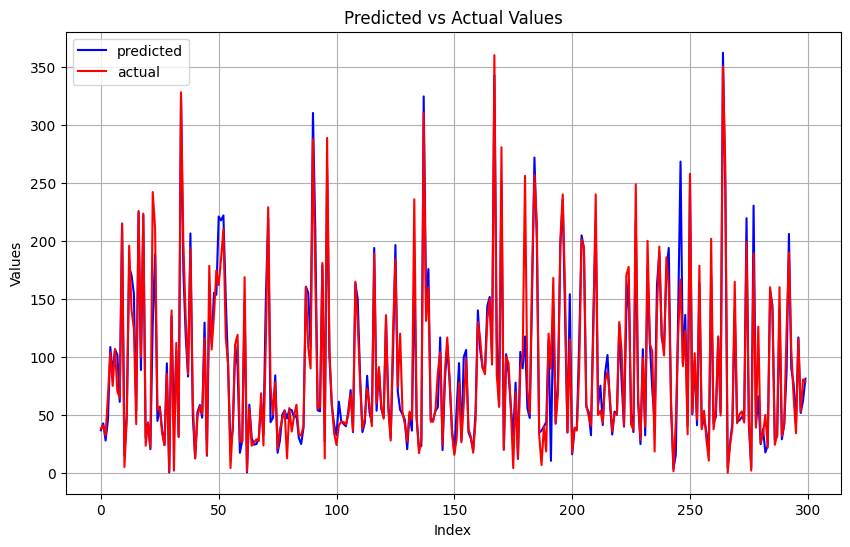

In [119]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'Predicted' and 'Actual' columns
# Replace 'df' with your actual DataFrame name

# Extracting 'Predicted' and 'Actual' columns from the DataFrame for the first 100 hours
predicted_values = df_comparison['Predicted'].iloc[:300]  # Selecting first 100 values
actual_values = df_comparison['Actual'].iloc[:300]  # Selecting first 100 values

# Creating a scatter plot for the first 100 hours
plt.figure(figsize=(10, 6))


# Connecting the dots with lines
plt.plot(range(len(predicted_values)), predicted_values, label='predicted', color='blue')  # Line connecting 'Predicted' values
plt.plot(range(len(actual_values)), actual_values, label='actual', color='red')  # Line connecting 'Actual' values

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


In [121]:
import xgboost as xgb


In [122]:
predict_xgb = reg.predict(X_test)

In [123]:
df_comparison_xgb = pd.DataFrame({
    'Predicted': predict_xgb,  # Replace 'pred_reg' with your predicted values
    'Actual': y_test        # Replace 'y_test' with your actual values
})

# Display the DataFrame
df_comparison_xgb

,Predicted,Actual
5478,45.513468,38.01
5920,56.896954,41.07
6868,34.423974,32.07
20026,62.794932,66.76
41600,76.278600,104.04
...,...,...
15837,57.264175,40.40
1029,95.549031,66.25
21990,0.855235,18.77
33114,129.012827,92.72


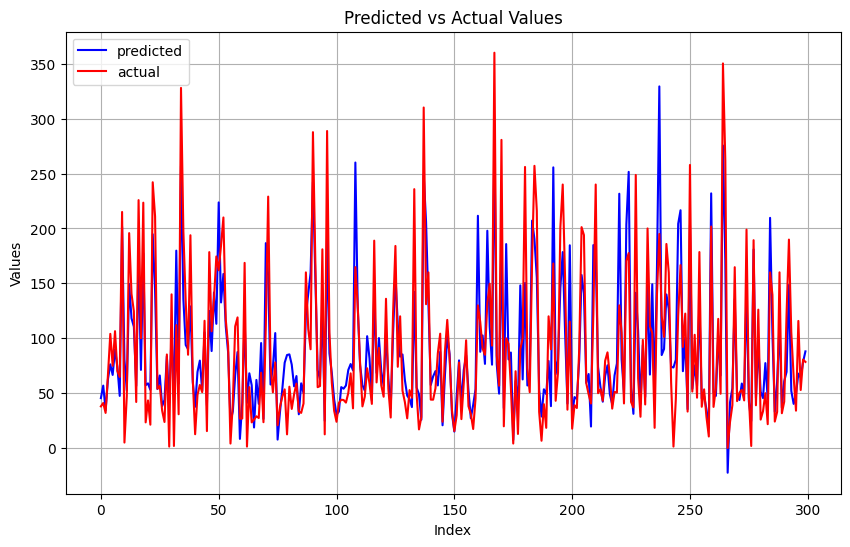

In [124]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'Predicted' and 'Actual' columns
# Replace 'df' with your actual DataFrame name

# Extracting 'Predicted' and 'Actual' columns from the DataFrame for the first 100 hours
predicted_values = df_comparison_xgb['Predicted'].iloc[:300]  # Selecting first 100 values
actual_values = df_comparison_xgb['Actual'].iloc[:300]  # Selecting first 100 values

# Creating a scatter plot for the first 100 hours
plt.figure(figsize=(10, 6))


# Connecting the dots with lines
plt.plot(range(len(predicted_values)), predicted_values, label='predicted', color='blue')  # Line connecting 'Predicted' values
plt.plot(range(len(actual_values)), actual_values, label='actual', color='red')  # Line connecting 'Actual' values

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


In [125]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Define XGBoost regressor
reg = xgb.XGBRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],  # Example values, adjust as needed
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)



Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}


ValueError: Feature shape mismatch, expected: 10, got 7

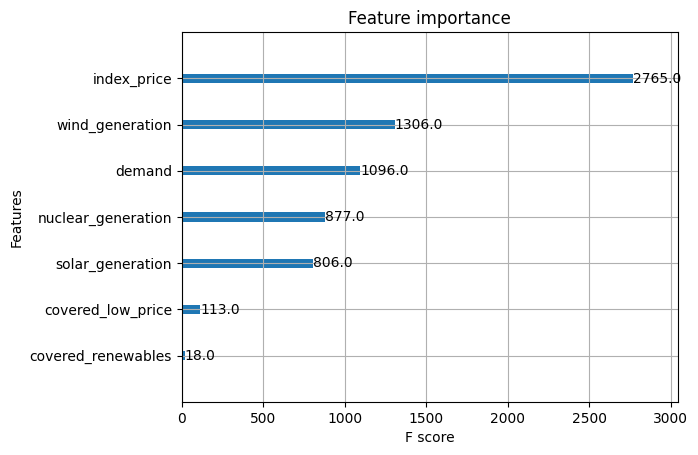

In [130]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBRegressor model
# Fit the model
xgb_optimal = xgb_model.fit(X_train, y_train, verbose=False)

# Get feature importances from the booster
booster = xgb_optimal.get_booster()

# Plot feature importance
xgb.plot_importance(booster)
plt.show()


In [131]:
df_comparison_xgb = pd.DataFrame({
    'Predicted': xgb_predict_optimal,  # Replace 'pred_reg' with your predicted values
    'Actual': y_test        # Replace 'y_test' with your actual values
})


# Get the indices from df_comparison_xgb
indices = df_comparison_xgb.index.tolist()

# Retrieve the dates from 'df' based on the indices
dates = df.loc[indices, 'day']
hours = df.loc[indices, 'hour']

# Add the 'Date' column to df_comparison_xgb
df_comparison_xgb['day'] = dates.values
df_comparison_xgb['hour'] = hours.values

# Display the DataFrame with dates
print(df_comparison_xgb)



# Display the DataFrame
df_comparison_xgb

        Predicted  Actual         day   hour
5478    43.255173   38.01  2019-08-17  09:00
5920    43.938148   41.07  2019-09-04  19:00
6868    28.418440   32.07  2019-10-14  07:00
20026   53.170639   66.76  2021-04-06  23:00
41600  109.189278  104.04  2023-09-15  07:00
...           ...     ...         ...    ...
15837   40.891972   40.40  2020-10-18  05:00
1029    65.569153   66.25  2019-02-12  22:00
21990   19.756201   18.77  2021-06-27  19:00
33114   92.828209   92.72  2022-09-30  12:00
42492  104.157410   80.00  2023-10-22  11:00

[11020 rows x 4 columns]


,Predicted,Actual,day,hour
5478,43.255173,38.01,2019-08-17,09:00
5920,43.938148,41.07,2019-09-04,19:00
6868,28.418440,32.07,2019-10-14,07:00
20026,53.170639,66.76,2021-04-06,23:00
41600,109.189278,104.04,2023-09-15,07:00
...,...,...,...,...
15837,40.891972,40.40,2020-10-18,05:00
1029,65.569153,66.25,2019-02-12,22:00
21990,19.756201,18.77,2021-06-27,19:00
33114,92.828209,92.72,2022-09-30,12:00


In [132]:
df

,wind_generation,day,hour,spot_price,solar_generation,demand,nuclear_generation,index_price,covered_renewables,covered_low_price
0,3214.0,2019-01-01,01:00,66.88,0.0,23753.0,6071.9,24.45,0,0
1,3222.0,2019-01-01,02:00,66.88,0.0,23018.0,6071.9,24.45,0,0
2,3081.0,2019-01-01,03:00,66.00,0.0,21808.0,6071.9,24.45,0,0
3,3069.0,2019-01-01,04:00,63.64,0.0,20635.0,6071.9,24.45,0,0
4,2973.0,2019-01-01,05:00,58.85,0.0,19824.0,6071.9,24.45,0,0
...,...,...,...,...,...,...,...,...,...,...
44074,1717.3,2023-12-24,19:00,101.55,7.9,27428.5,7117.2,31.61,0,0
44075,1943.5,2023-12-24,20:00,109.30,0.0,27998.0,7117.2,31.61,0,0
44076,1942.0,2023-12-24,21:00,109.30,0.0,27489.3,7117.2,31.61,0,0
44077,1836.0,2023-12-24,22:00,92.85,0.0,25901.0,7117.2,31.61,0,0


In [61]:
mse = mean_squared_error(y_test, xgb_predict_optimal)
mse

357.99749641867066

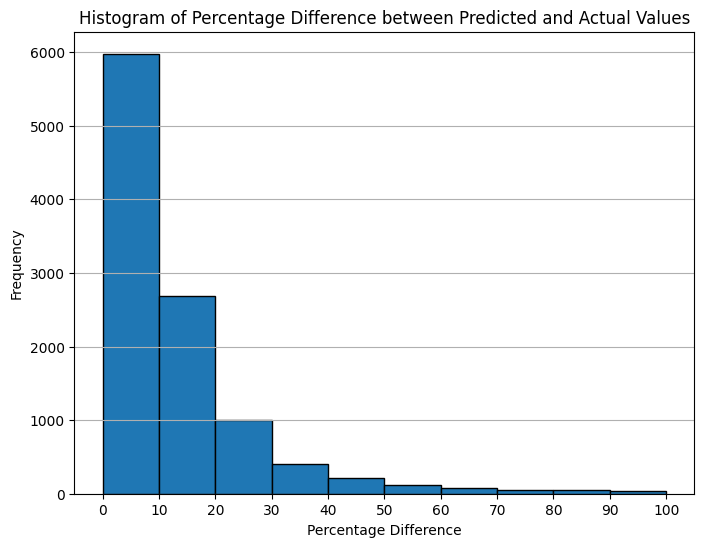

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with actual and predicted values



# Calculate percentage difference between predicted and actual values
df_comparison_xgb['Absolute Difference (%)'] = (abs(df_comparison_xgb['Predicted'] - df_comparison_xgb['Actual']) / df_comparison_xgb['Actual']) * 100

# Define bins for the histogram (e.g., -10 to 10, 10 to 20, ..., 90 to 100)
bins = np.arange(0, 101, 10)

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(df_comparison_xgb['Absolute Difference (%)'], bins=bins, edgecolor='black')
plt.xlabel('Percentage Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Difference between Predicted and Actual Values')
plt.xticks(bins)
plt.grid(axis='y')
plt.show()


In [134]:
df_comparison_xgb

,Predicted,Actual,day,hour,Absolute Difference (%)
5478,43.255173,38.01,2019-08-17,09:00,13.799455
5920,43.938148,41.07,2019-09-04,19:00,6.983561
6868,28.418440,32.07,2019-10-14,07:00,11.386218
20026,53.170639,66.76,2021-04-06,23:00,20.355544
41600,109.189278,104.04,2023-09-15,07:00,4.949325
...,...,...,...,...,...
15837,40.891972,40.40,2020-10-18,05:00,1.217751
1029,65.569153,66.25,2019-02-12,22:00,1.027694
21990,19.756201,18.77,2021-06-27,19:00,5.254133
33114,92.828209,92.72,2022-09-30,12:00,0.116705


In [138]:
big_differences = df_comparison_xgb[df_comparison_xgb['Absolute Difference (%)']>50]
big_differences

,Predicted,Actual,day,hour,Absolute Difference (%)
43074,53.589771,23.44,2023-11-13,03:00,128.625304
42670,2.583275,1.38,2023-10-29,03:00,87.193846
18967,34.599960,1.95,2021-02-21,18:00,1674.356940
38325,29.948658,4.16,2023-05-01,20:00,619.919663
42671,2.583275,1.38,2023-10-29,03:00,87.193846
...,...,...,...,...,...
36006,106.635056,70.00,2023-01-25,03:00,52.335794
35583,27.060736,14.00,2023-01-07,12:00,93.290969
22806,50.834835,13.32,2021-07-31,19:00,281.642906
18627,27.770990,15.09,2021-02-07,14:00,84.035721


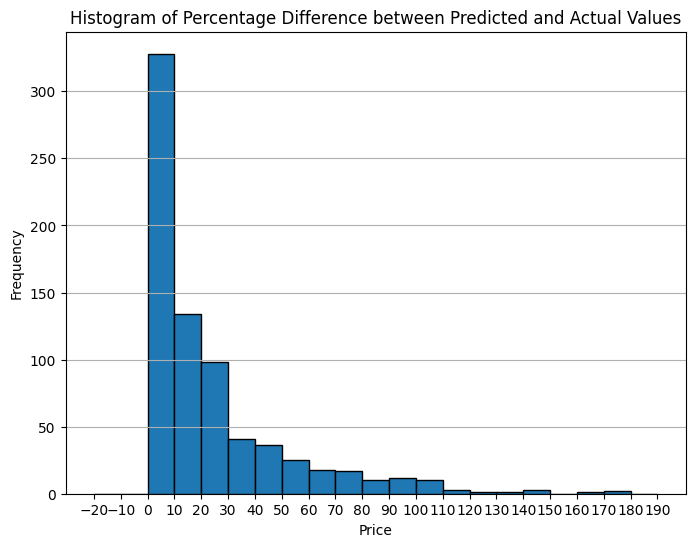

In [137]:
# Define bins for the histogram (e.g., -10 to 10, 10 to 20, ..., 90 to 100)
bins = np.arange(-20, 200, 10)

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(big_differences['Actual'], bins=bins, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Difference between Predicted and Actual Values')
plt.xticks(bins)
plt.grid(axis='y')
plt.show()

In [139]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_comparison_xgb['Predicted'], df_comparison_xgb['Actual'])

10.724308158651947